# Version V - Color operations data augmentation

### Imports and initial setup

In [5]:
import import_ipynb

from InitialSetup import dataset, BATCH_SIZE, tf, prepare_callbacks, model_VI, show_history, test_dataset, AUTOTUNE, process_hue, process_contrast, process_brightness, process_saturation

In [6]:
dataSoloV5 = dataset
dataSoloV5 = dataSoloV5.concatenate(dataset.map(process_hue))
dataSoloV5 = dataSoloV5.concatenate(dataset.map(process_contrast))
dataSoloV5 = dataSoloV5.concatenate(dataset.map(process_brightness))
dataSoloV5 = dataSoloV5.concatenate(dataset.map(process_saturation))

dataSoloV5_size = tf.data.experimental.cardinality(dataSoloV5).numpy()

dataSoloV5 = dataSoloV5.cache()
dataSoloV5 = dataSoloV5.shuffle(buffer_size = dataSoloV5_size)
dataSoloV5 = dataSoloV5.batch(batch_size = BATCH_SIZE)
dataSoloV5 = dataSoloV5.prefetch(buffer_size = AUTOTUNE)
dataSoloV5 = dataSoloV5.repeat()

train_size = int(0.8* dataSoloV5_size)
val_size = int(0.2* dataSoloV5_size)

train_dataset = dataSoloV5.take(train_size)
val_dataset = dataSoloV5.skip(train_size)

### Setup model and save place

In [7]:
modelV5 = model_VI(43, 32, 3)

file_pathV5 = './Networks/ColorOperationsDataAugmentation.ckpt'

callbacksV5 = prepare_callbacks(file_pathV5)

### Train model

In [8]:
historyV5 = modelV5.fit(train_dataset, steps_per_epoch = train_size/BATCH_SIZE,
          epochs=20, 
          validation_data = val_dataset, 
          validation_steps = val_size/BATCH_SIZE,
          callbacks = callbacksV5)

Epoch 1/20
2450/2450 [==============================] - 112s 30ms/step - loss: 1.9190 - accuracy: 0.5064 - val_loss: 0.0841 - val_accuracy: 0.9788

Epoch 00001: val_accuracy improved from -inf to 0.97879, saving model to ./Networks\ColorOperationsDataAugmentation.ckpt
Epoch 2/20
2450/2450 [==============================] - 73s 30ms/step - loss: 0.1835 - accuracy: 0.9464 - val_loss: 0.0402 - val_accuracy: 0.9891

Epoch 00002: val_accuracy improved from 0.97879 to 0.98909, saving model to ./Networks\ColorOperationsDataAugmentation.ckpt
Epoch 3/20
2450/2450 [==============================] - 73s 30ms/step - loss: 0.1001 - accuracy: 0.9705 - val_loss: 0.0307 - val_accuracy: 0.9919

Epoch 00003: val_accuracy improved from 0.98909 to 0.99192, saving model to ./Networks\ColorOperationsDataAugmentation.ckpt
Epoch 4/20
2450/2450 [==============================] - 73s 30ms/step - loss: 0.0691 - accuracy: 0.9800 - val_loss: 0.0238 - val_accuracy: 0.9933

Epoch 00004: val_accuracy improved from 0.

### Show the learning history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


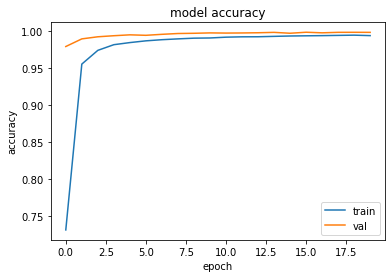

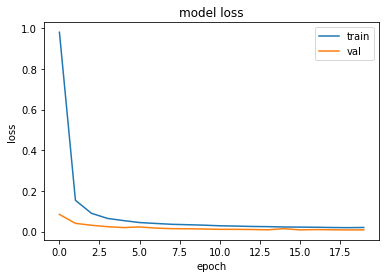

In [9]:
show_history(historyV5)

### Load weights from file and test with validation and test dataset

In [10]:
modelV5.load_weights(file_pathV5)

evalV5 = modelV5.evaluate(test_dataset, verbose=2)
valV5 = modelV5.evaluate(val_dataset, steps=val_size/BATCH_SIZE, verbose=2)

198/198 - 3s - loss: 0.0659 - accuracy: 0.9857
612/612 - 26s - loss: 0.0078 - accuracy: 0.9978
